# COMP 579 Assignment 1

1. Do Not Change the Random Seed
The random seed has been set to ensure reproducibility. Please do not modify it.

2. Guidance for the First Question
For the initial question, fill in the blanks under the sections marked as TODO. Follow the provided structure and complete the missing parts.

3. Approach for Subsequent Questions
For the later questions, we expect you to attempt the solutions independently. You can refer to the examples provided in earlier questions to understand how to 
plot figures and implement solutions.

4. Ensure that the plots you produce for later questions are similar in style and format to those shown in the previous examples.

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(40)

plt.rcParams["figure.figsize"]=10,5

## Q1 Simulator for Bernoulli Bandit

In [6]:
class GaussianBandit:
    """
    A class representing a Gaussian multi-armed bandit.

    Attributes
    ----------
    num_arms : int
        Number of arms in the bandit.
    mean : list or np.ndarray
        List of mean rewards for each arm.
    variance : float
        Variance of the rewards for all arms.

    Methods
    -------
    sample(arm_index)
        Samples a reward from the specified arm based on a Gaussian distribution.
    """

    # TODO:
    def __init__(self, num_arms, mean, variance):
        self.num_arms = num_arms
        self.mean = mean
        self.variance = variance

    def sample(self, arm_index):
        reward = np.random.normal(self.mean[arm_index], self.variance)
        return reward

In [7]:
# TODO:
delta = 0.2
num_arms = 3
means = [0.5 + delta, 0.5, 0.5 - delta]
variance = 0.01
num_samples = 50

three_arm_gaussian_bandit = GaussianBandit(num_arms, means, variance)

# Store the rewards for each arm
action_rewards = []
actions = range(num_arms)

for action in actions:
    # Store 50 samples per action
    rewards = [three_arm_gaussian_bandit.sample(action) for _ in range(num_samples)]
    action_rewards.append(rewards)

### Graphs

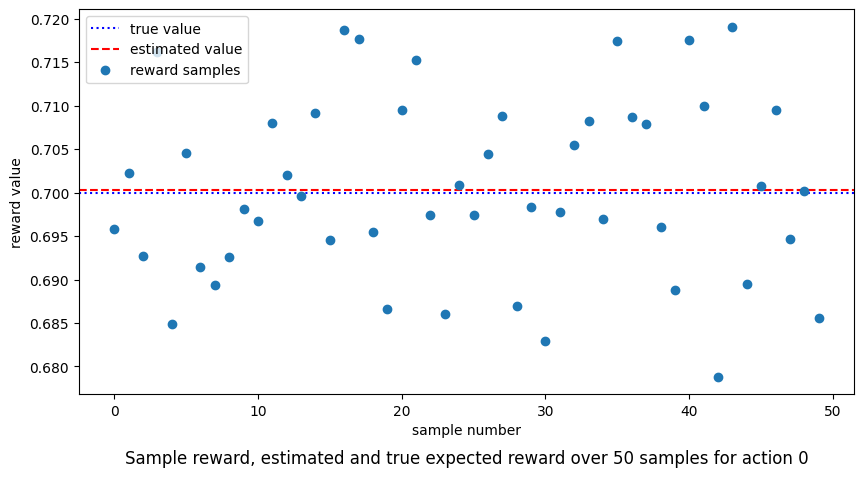

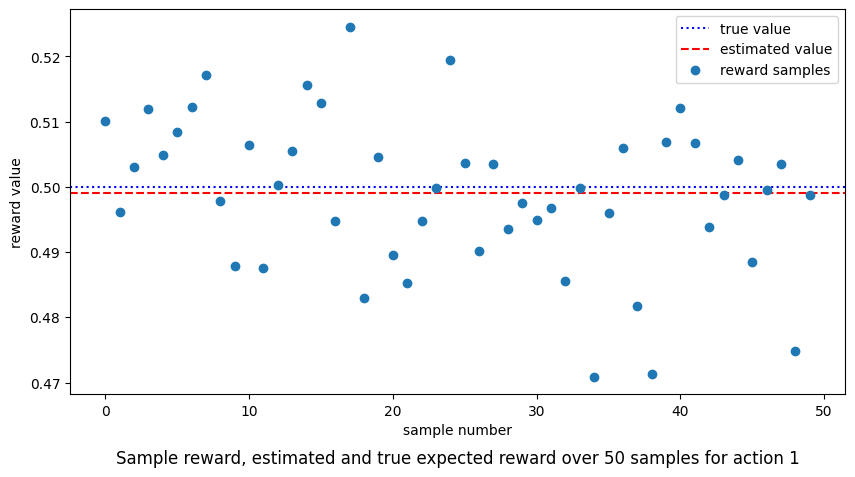

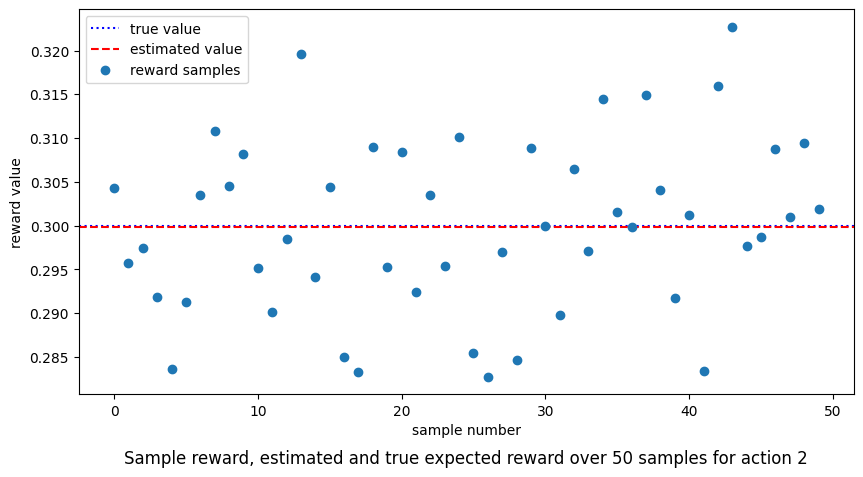

In [8]:
for action in actions:
    fig, ax = plt.subplots()

    # TODO:
    true_value = means[action]
    estimated_value = np.mean(action_rewards[action])

    # draw the line of the true value
    line_true_val = ax.axhline(
        y=true_value, color="b", linestyle=":", label="true value"
    )
    # draw the line of the estimated value
    line_est_val = ax.axhline(
        y=estimated_value, color="r", linestyle="--", label="estimated value"
    )
    # plot the reward samples
    (plt_samples,) = ax.plot(action_rewards[action], "o", label="reward samples")

    ax.set_xlabel("sample number")
    ax.set_ylabel("reward value")
    ax.set_title(
        "Sample reward, estimated and true expected reward over 50 samples for action %s"
        % action,
        y=-0.2,
    )

    # show the legend with the labels of the line
    ax.legend(handles=[line_true_val, line_est_val, plt_samples])

## Q2 Estimated Q values

In [9]:
def update(reward_samples, alpha):
    """
    Each call to the function yields the current incremental average of the reward with a fixed learning rate, alpha
    E.g. Inital call returns alpha * reward_samples[0], second call returns prev_val + alpha * (reward_samples[1] - prev_val)
    where prev_val is the value return from the previous call, so on and so forth

    Parameters
    ----------
    reward_samples : array of int
        samples of reward values from one arm of a bandit
    alpha : int
        learning rate parameter for the averaging
    """
    prev_val = 0
    for sample in reward_samples:
        new_val = prev_val + alpha * (sample - prev_val)
        prev_val = new_val
        yield new_val


def updateAvg(reward_samples):
    """
    Each call to the function yields the current incremental average of the reward
    E.g. Inital call returns reward_samples[0], second call returns the average of reward_samples[0] and reward_samples[0], so on and so forth

    Parameters
    ----------
    reward_samples : array of int
        samples of reward values from one arm of a bandit
    """
    prev_val = reward_samples[0]
    n = 1
    # first iteration only updates n to 2, no update to average
    for sample in reward_samples:
        new_val = ((prev_val * n) + sample) / (n + 1)
        prev_val = new_val
        n = n + 1
        yield new_val


def updateDecaying(reward_samples, alpha_0=0.5, lambda_=0.01, p=0.5):
    """
    Each call to the function yields the updated estimate of the action value using an
    improved decaying learning rate.

    Parameters
    ----------
    reward_samples : array-like of int or float
        Samples of reward values from one arm of a bandit.
    alpha_0 : float, optional
        The initial learning rate (default is 0.5).
    lambda_ : float, optional
        The decay rate constant (default is 0.01).
    p : float, optional
        The power parameter for controlling decay (default is 0.5).
    """
    prev_val = 0
    # Time step starts from 1
    t = 1
    for sample in reward_samples:
        # Decaying learning rate formula
        alpha_t = alpha_0 / (1 + lambda_ * t**p)

        # Update rule
        new_val = prev_val + alpha_t * (sample - prev_val)

        # Update previous value and increment time step
        prev_val = new_val
        t += 1

        # Yield the updated value
        yield new_val

### Graphs

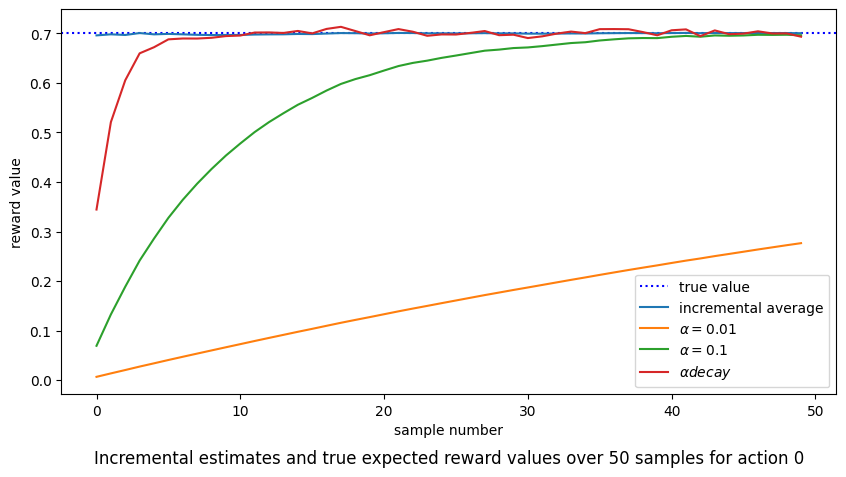

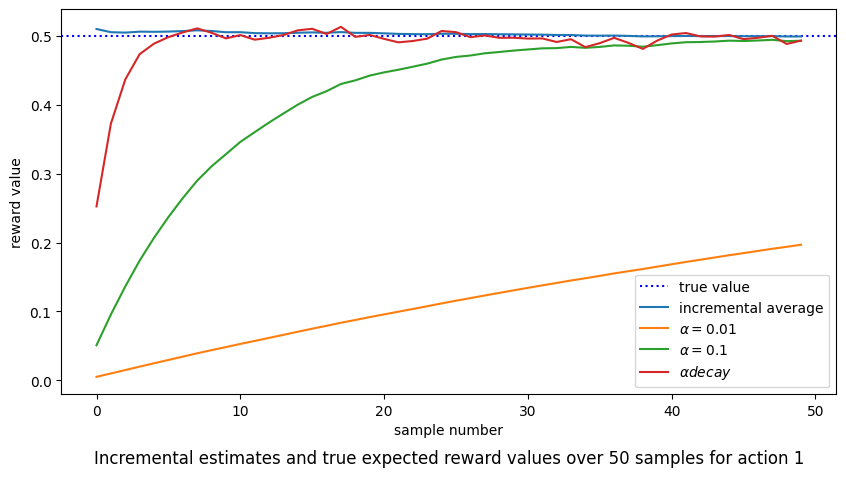

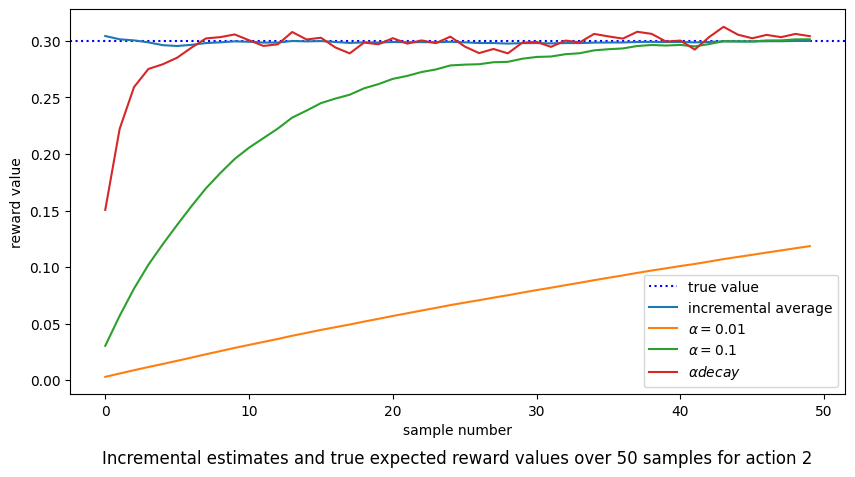

In [10]:
for action in actions:
    fig, ax = plt.subplots()

    # TODO:
    incr_avgs = list(updateAvg(action_rewards[action]))
    alpha_1_percent = list(update(action_rewards[action], 0.01))
    alpha_10_percent = list(update(action_rewards[action], 0.1))
    alpha_decay = list(updateDecaying(action_rewards[action]))
    true_value = means[action]

    # draw the true value line
    line_true_val = ax.axhline(
        y=true_value, color="b", linestyle=":", label="true value"
    )

    # plot incremental values for averaging, alpha = 0.01, alpha = 0.1
    (plt_incr_avgs,) = ax.plot(incr_avgs, label="incremental average")
    (plt_alpha_1_percent,) = ax.plot(alpha_1_percent, label=r"$\alpha = 0.01$")
    (plt_alpha_10_percent,) = ax.plot(alpha_10_percent, label=r"$\alpha = 0.1$")
    (plt_alpha_decay,) = ax.plot(alpha_decay, label=r"$\alpha decay$")

    ax.set_xlabel("sample number")
    ax.set_ylabel("reward value")
    ax.set_title(
        "Incremental estimates and true expected reward values over 50 samples for action %s"
        % action,
        y=-0.2,
    )

    # show the legend with the labels of the line
    ax.legend(
        handles=[
            line_true_val,
            plt_incr_avgs,
            plt_alpha_1_percent,
            plt_alpha_10_percent,
            plt_alpha_decay,
        ]
    )

## Q3 Effect of $α$ on Estimated Q values

In [ ]:
# TODO:
num_samples = 

# arrays of the data generated from 100 runs
incr_avgs_runs = []
alpha_1_percent_runs = []
alpha_10_percent_runs = []
alpha_decay_runs = []


# TODO:
for run in range(100):
  # arrays of data generated from the 3 actions in 1 run
  sample_incr_avgs_by_actions = []
  sample_alpha_1_percent_by_actions = []
  sample_alpha_10_percent_by_actions = []
  sample_alpha_decay_by_actions = []

  for action in actions:
    rewards = 
    sample_incr_avgs_by_actions.append()
    sample_alpha_1_percent_by_actions.append()
    sample_alpha_10_percent_by_actions.append()
    sample_alpha_decay_by_actions.append()

  incr_avgs_runs.append(sample_incr_avgs_by_actions)
  alpha_1_percent_runs.append(sample_alpha_1_percent_by_actions)
  alpha_10_percent_runs.append(sample_alpha_10_percent_by_actions)
  alpha_decay_runs.append(sample_alpha_decay_by_actions)

# convert to np arrays
incr_avgs_runs = np.asarray(incr_avgs_runs)
alpha_1_percent_runs = np.asarray(alpha_1_percent_runs)
alpha_10_percent_runs = np.asarray(alpha_10_percent_runs)
alpha_decay_runs = np.asarray(alpha_decay_runs)

### Graphs

In [ ]:
for action in actions:
  fig, ax = plt.subplots()

  # obtain averaged incremental reward values for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  # TODO:
  mean_incr_avgs_by_actions = 
  mean_alpha_1_percent_by_actions = 
  mean_alpha_10_percent_by_actions =
  mean_alpha_decay_by_actions = 

  true_value =

  # obtain the standard deviation for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  std_incr_avgs_by_actions = 
  std_alpha_1_percent_by_actions = 
  std_alpha_10_percent_by_actions = 
  std_alpha_decay_by_actions = 

  # obtain the standard error for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  std_err_incr_avgs_by_actions = 
  std_err_alpha_1_percent_by_actions = 
  std_err_alpha_10_percent_by_actions =
  std_err_alpha_decay_by_actions = 
  
  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # draw the averaged incremental reward values for averaging
  plt_incr_avgs, = ax.plot(mean_incr_avgs_by_actions, label = "incremental average")
  # draw the error bar/area for averaging
  incr_avgs_minus_std_err = mean_incr_avgs_by_actions - std_err_incr_avgs_by_actions
  incr_avgs_plus_std_err = mean_incr_avgs_by_actions + std_err_incr_avgs_by_actions
  ax.fill_between(range(0,100), incr_avgs_minus_std_err, incr_avgs_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.01
  plt_alpha_1_percent, = ax.plot(mean_alpha_1_percent_by_actions, label = "alpha = 0.01")
  # draw the error bar/area for alpha = 0.01
  alpha_1_percent_minus_std_err = mean_alpha_1_percent_by_actions - std_err_alpha_1_percent_by_actions
  alpha_1_percent_plus_std_err = mean_alpha_1_percent_by_actions + std_err_alpha_1_percent_by_actions
  ax.fill_between(range(0,100), alpha_1_percent_minus_std_err, alpha_1_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.1
  plt_alpha_10_percent, = ax.plot(mean_alpha_10_percent_by_actions, label = "alpha = 0.1")
  # draw the error bar/area for alpha = 0.1
  alpha_10_percent_minus_std_err = mean_alpha_10_percent_by_actions - std_err_alpha_10_percent_by_actions
  alpha_10_percent_plus_std_err = mean_alpha_10_percent_by_actions + std_err_alpha_10_percent_by_actions
  ax.fill_between(range(0,100), alpha_10_percent_minus_std_err, alpha_10_percent_plus_std_err, alpha=0.3)
  
  plt_alpha_decay, = ax.plot(mean_alpha_decay_by_actions, label = "alpha decay")
  alpha_decay_minus_std_err = mean_alpha_decay_by_actions - std_err_alpha_decay_by_actions
  alpha_decay_plus_std_err = mean_alpha_decay_by_actions + std_err_alpha_decay_by_actions
  ax.fill_between(range(0,100), alpha_decay_minus_std_err, alpha_decay_plus_std_err, alpha=0.3)

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values averaged over 100 runs for action %s" %action, y=-0.2)

  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent, plt_alpha_decay])

### Answers


## Q4 Epsilon-greedy

In [249]:
def epsilon_greedy(bandit, epsilon, alpha = None, num_time_step = 1000, epsilon_decay=False, lambda_=0.001):
  """Epsilon greedy algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  epsilon: float
      A parameter which determines the probability for a random action to be selected
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """
  # TODO:
  num_arms = 

  Q_arr = 
  N_arr = 
  total_R = 
  total_l = 
  actions = 

  opt_value = 
  best_action = 

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []
  
  epsilon_t = epsilon 

  for time_step in range(num_time_step):
    if epsilon_decay:
        epsilon_t = 
            
    A_star = 
    A_random = 
    A = 
    curr_R = 
    N_arr[A] = 

    if alpha == None:
      # incremental averaging
      Q_arr[A] = 
    else:
      Q_arr[A] = 

    R_over_t.append(curr_R)

    total_R = 
    total_R_over_t.append(total_R)

    est_is_best = 
    est_is_best_over_t.append(est_is_best)

    l_t = 
    l_over_t.append(l_t)

    total_l = 
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

In [ ]:
#TODO:
epsilons = []
decaying_epsilon_params = {'epsilon_0': , 'lambda_': }  # Decaying epsilon parameters

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons + ["decay"]:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if epsilon == "decay":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_gaussian_bandit, 
          decaying_epsilon_params['epsilon_0'], 
          epsilon_decay=True, 
          lambda_=decaying_epsilon_params['lambda_']
      )
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_gaussian_bandit, 
          epsilon
      )
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs  for Epsilon Greedy with Varying Epsilons'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

## Q5 Hyperparameters for Epsilon-greedy

To have a plain start, you have been provided with predefined functions for generating plots until now. However, moving forward, you are expected to plot graphs on your own.

### Graphs

### Answers

## Q6 Gradient Bandit

### Graphs

### Answers

## Q7 Thompson Sampling

### Graphs

### Answers

## Q8 Comparison of Algorithms

### Graphs

### Answers

## Q9 Non-stationary Environment

### Answers